# Project IV : Dimensionality Reduction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'png'

## 1.โหลด Dataset เข้าไปใน Python Pandas


In [3]:
from sklearn.datasets import load_wine

In [4]:
wine = load_wine()

In [5]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [9]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


## 2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว



In [10]:
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [11]:
df.tail(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750.0
169,13.40,4.60,2.86,25.0,112.0,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630.0
170,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510.0
171,12.77,2.39,2.28,19.5,86.0,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470.0
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660.0
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560.0


In [12]:
df.sample(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
140,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0
105,12.42,2.55,2.27,22.0,90.0,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315.0
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0
54,13.74,1.67,2.25,16.4,118.0,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060.0
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0
75,11.66,1.88,1.92,16.0,97.0,1.61,1.57,0.34,1.15,3.80,1.23,2.14,428.0
15,13.63,1.81,2.70,17.2,112.0,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0


## 3. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Note :  
* ไม่มี missing values

In [14]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## 4. ใช้ pairplot ดูความสัมพันธ์เบื้องต้น


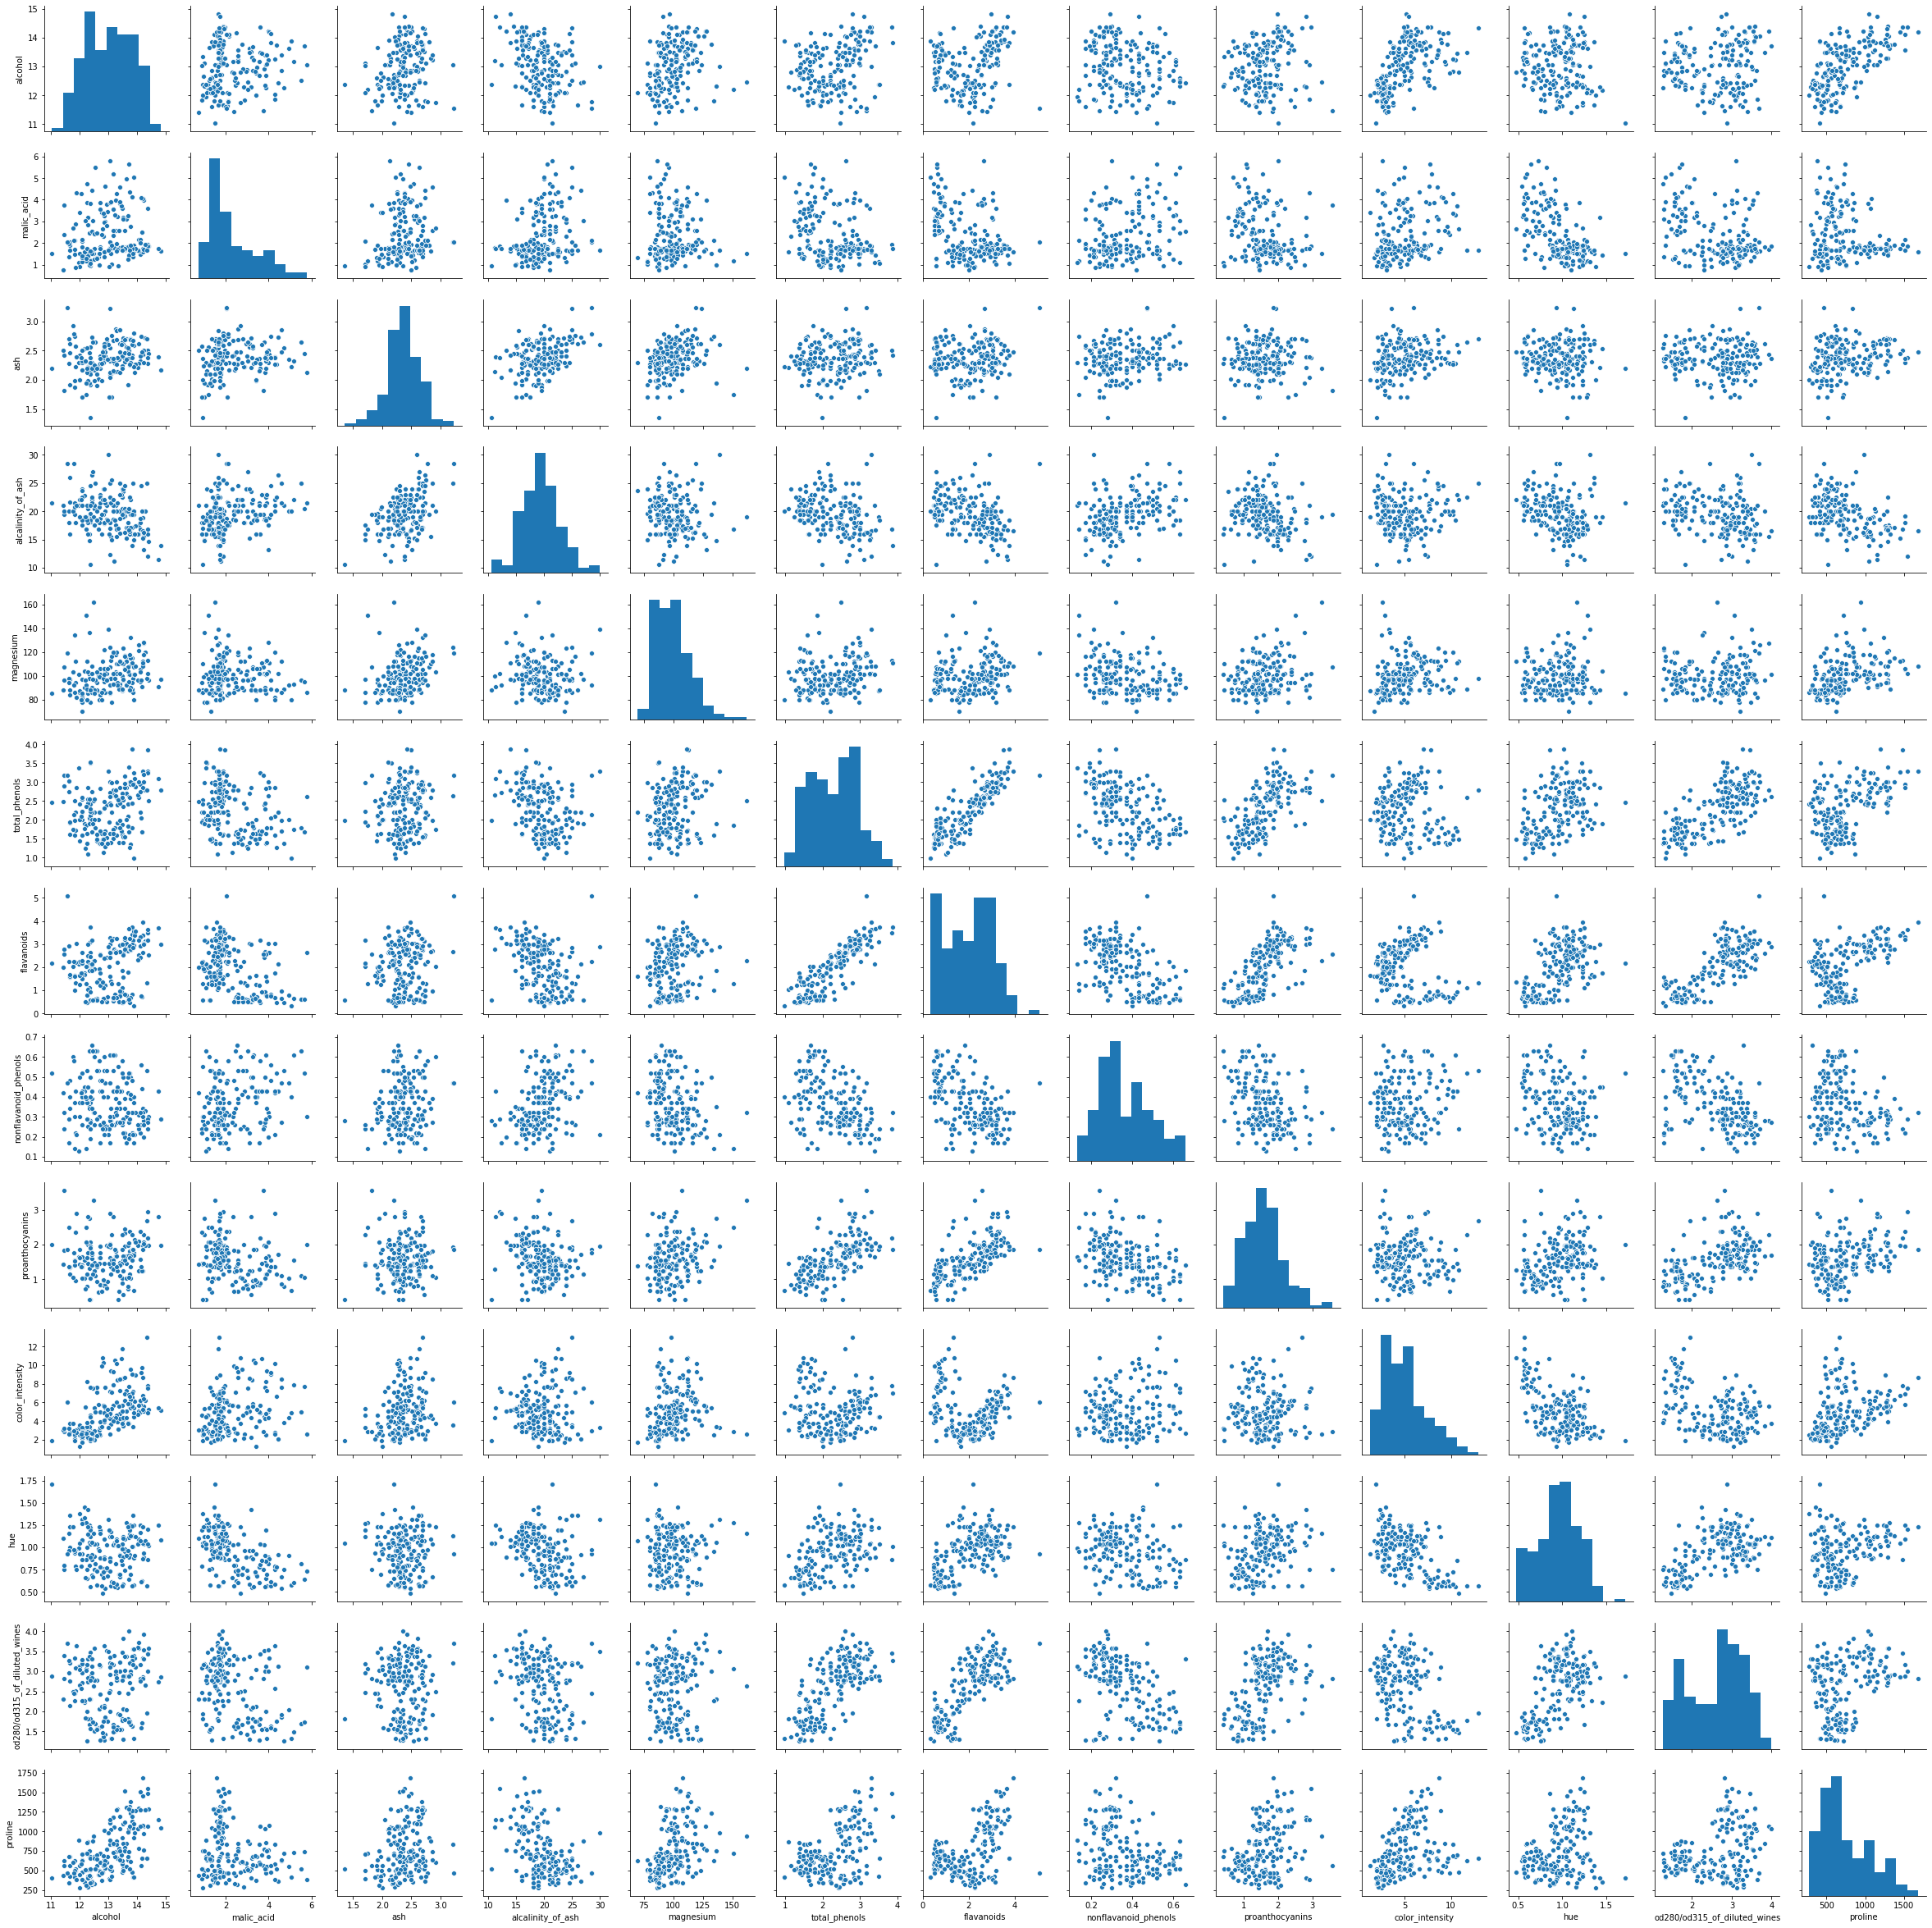

In [15]:
sns.pairplot(df)

## 5. เช็คค่า Correlation ของ Dataset


In [16]:
df_corr = df.corr()
df_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


## 6.ใช้ Correlation ทำ Heatmap


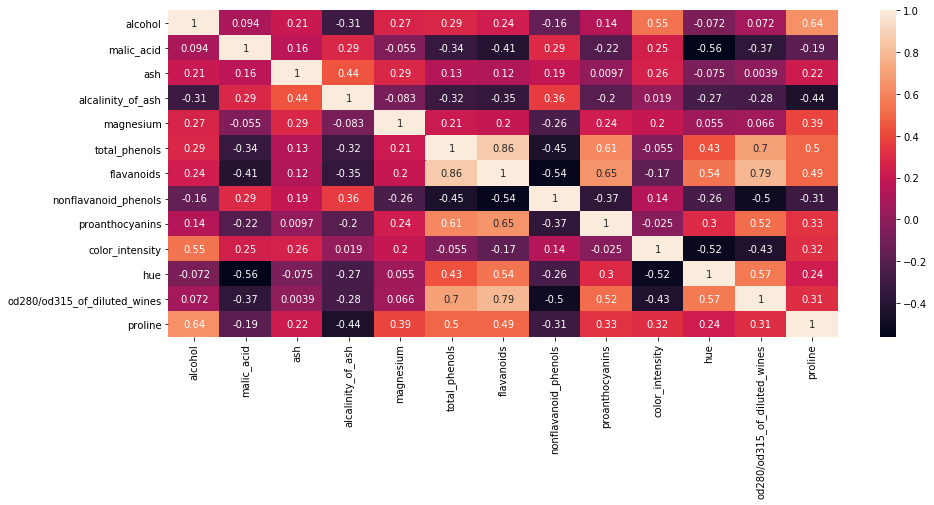

In [17]:
fig = plt.figure(figsize=(15,6))
sns.heatmap(df_corr, annot=True)

## 7. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation สูงสุด


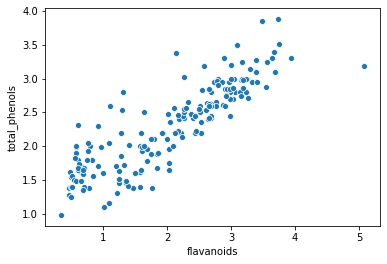

In [18]:
# most correlated pair : flavanoids & total_phenols (0.86)
sns.scatterplot(data=df, x='flavanoids', y='total_phenols')

## 8. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ต่ำสุด


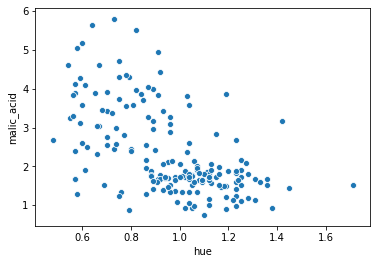

In [19]:
# most negative correlated pair : hue & malic_acid (-0.56)
sns.scatterplot(data=df, x='hue', y='malic_acid')

## 9. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ใกล้ 0 ที่สุด


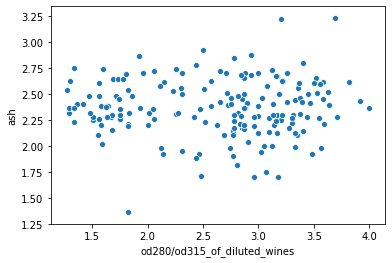

In [19]:
# least correlated pair : od280/od315_of_diluted_wines & ash (0.0039)
sns.scatterplot(data=df, x='od280/od315_of_diluted_wines', y='ash')

## 10. ใช้ seaborn และ matplotlib สร้าง subplot 9 รูป (3x3) แต่ละรูปเป็น boxplot ของ Feature 1 – Feature 9


In [20]:
df.columns.values

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], dtype=object)

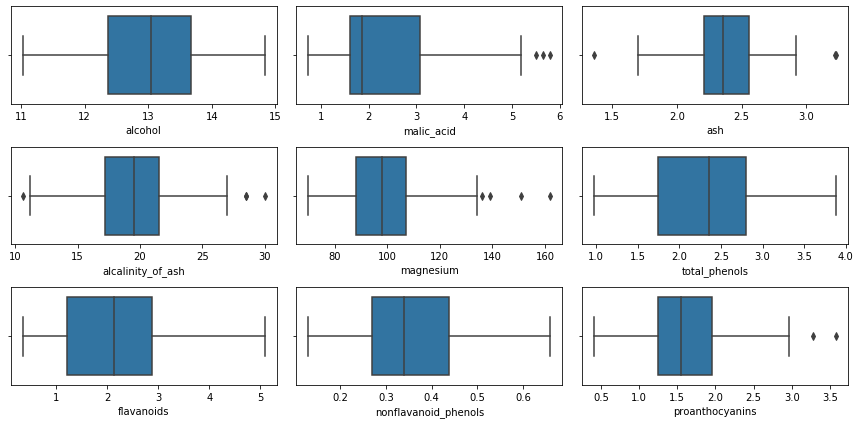

In [21]:
col = df.columns.values

fig = plt.figure(figsize=(12,6))
for i in range(0,9):
    plt.subplot(331+i)
    sns.boxplot(df[col[i]])
fig.tight_layout()

## 11. ใช้ seaborn และ matplotlib สร้าง subplot 4 รูป (2x2) แต่ละรูปเป็น boxplot ของ Feature 10 – Feature 13


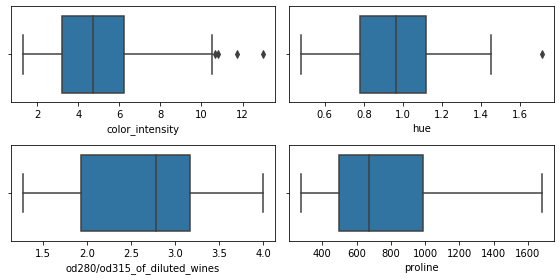

In [22]:
fig = plt.figure(figsize=(8,4))
for i in range(9,13):
    plt.subplot(220+i-8)
    sns.boxplot(df[col[i]])
fig.tight_layout()

## 12. จากข้อ 10-11 สามารถจัดการกับ Outliers ได้ตามความเหมาะสม


In [20]:
# Note :  
# IQR = Q3 - Q1  
# lower fence = Q1 - (1.5 * IQR)  
# upper fence = Q3 + (1.5 * IQR) 

def clip_outliers(series):
    # calculate Q1, Q3, IQR, lower_fence and upper_fence
    Q1 = series.describe()[4]
    Q3 = series.describe()[6]
    IQR = Q3 - Q1
    lower_fence = Q1 - (1.5 * IQR)
    upper_fence = Q3 + (1.5 * IQR)
    
    # clip outliers
    series = [lower_fence if x < lower_fence else upper_fence if x > upper_fence else x for x in series]
    return series

In [21]:
for col in df.columns :
    df[col] = clip_outliers(df[col])

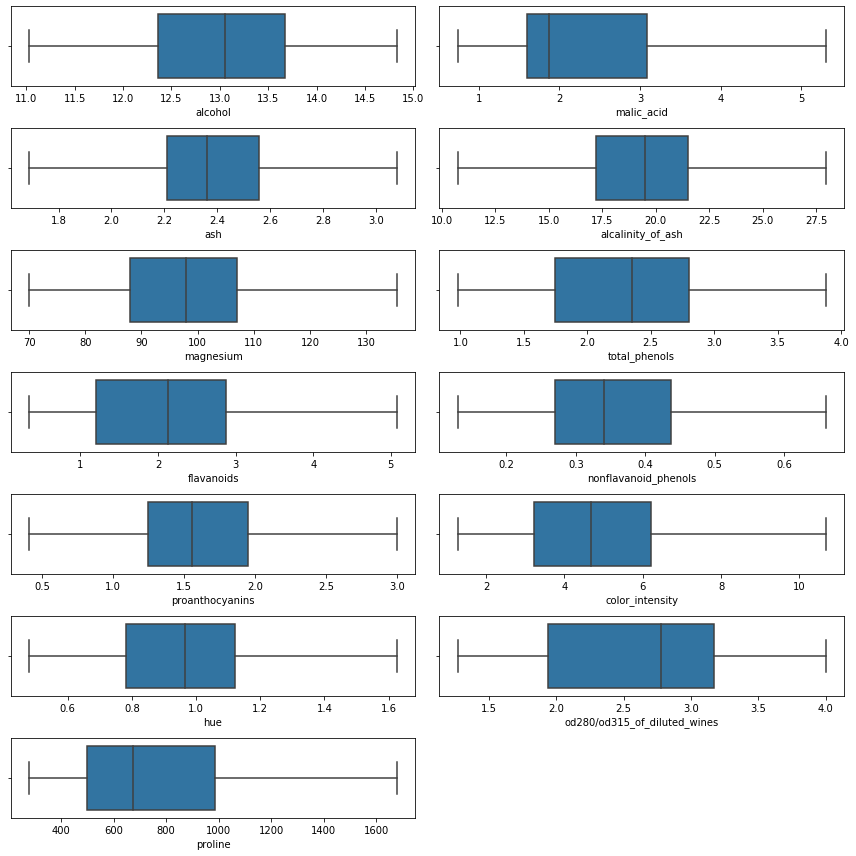

In [22]:
# Plot the box plot again

fig = plt.figure(figsize=(12,12))
i = 1

for col in df.columns :
    plt.subplot(7,2,i)
    sns.boxplot(df[col])
    i+=1
fig.tight_layout()

## 13. เช็คว่ามีข้อมูลหายไปหรือไม่ สามารถจัดการได้ตามความเหมาะสม


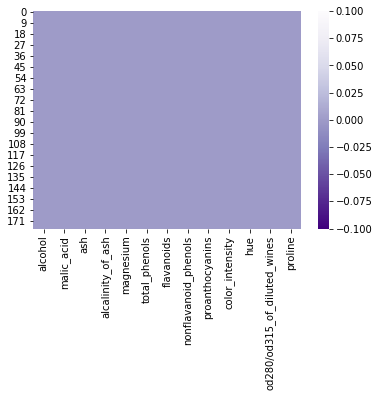

In [23]:
sns.heatmap(df.isnull(), cmap='Purples_r')

Note :  
ไม่มี missing values

## 14. เพิ่มผลลัพธ์เป็นคอลัมน์ที่ 14


In [24]:
df['class'] = wine.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## 15. Split ข้อมูลด้วย train_test_split โดยใช้อัตราส่วน 60:40


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# select X and y
X = df.drop(['class'], axis=1).copy()
y = df['class'].copy()

In [30]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [31]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: class, Length: 178, dtype: int64

In [27]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=500)
print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (106, 13)
X_test shape :  (72, 13)
y_train shape :  (106,)
y_test shape :  (72,)


## 16. ทำ Feature Scaling ด้วย Standardization โดยใช้ข้อมูล X_train เป็นตัว fit


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc_X = StandardScaler()

# fit_transform X_train
X_train_sc = sc_X.fit_transform(X_train)
# transform X_test
X_test_sc = sc_X.transform(X_test)

In [35]:
X_train_sc

array([[-0.61751461,  0.14498975, -0.39507567, ..., -0.4862321 ,
         0.96125129, -1.35863928],
       [-0.39356139, -0.97375806, -1.87535918, ...,  0.31684163,
         0.17460748, -0.5411577 ],
       [ 1.22387852, -0.65939917, -0.99519061, ..., -0.26315606,
         1.0057783 ,  0.85882089],
       ...,
       [ 1.1367856 , -0.76110352,  1.00519252, ...,  0.71837849,
        -0.12223924,  1.33871898],
       [-0.67972384, -1.09395411,  0.76514655, ...,  0.98606973,
        -0.52298231, -0.15723922],
       [-1.04053736, -0.52071143, -0.19503736, ...,  0.49530245,
        -0.56750932, -0.81254835]])

## 17. สร้างโมเดลแบบ Support Vector Machine (เป็น Baseline) 


In [30]:
from sklearn.svm import SVC

In [31]:
# define model
clf = SVC()
# fit model
clf.fit(X_train_sc, y_train)
# make prediction
y_pred_svm = clf.predict(X_test_sc)

## 18. สร้าง countplot ของค่าที่ทำนายโดย Support Vector Machine


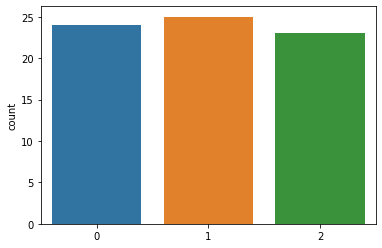

In [32]:
sns.countplot(y_pred_svm)

## 19. วัดผลโมเดล SVM โดยใช้ confusion matrix


In [33]:
from sklearn import metrics

In [34]:
cm = metrics.confusion_matrix(y_test, y_pred_svm)
cm

array([[24,  1,  0],
       [ 0, 23,  1],
       [ 0,  1, 22]])

## 20. ประเมินผลโมเดล SVM ด้วยคะแนน Accuracy, F1 score, Recall, Precision ทั้งแบบ Micro, Macro


In [35]:
# เตรียม dataframe ของค่า evaluations เพื่อใช้ Plot ตอนท้าย
df_eval = pd.DataFrame(columns=['Model','Acc','F1_micro','F1_macro','Precision_micro','Precision_macro','Recall_micro','Recall_macro'])
df_eval

,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro


In [36]:
def model_eval(y_test, y_pred, model_name, df_eval):
    # calculate evaluation metrics
    acc = metrics.accuracy_score(y_test, y_pred)
    f1_micro = metrics.f1_score(y_test, y_pred, average='micro')
    f1_macro = metrics.f1_score(y_test, y_pred, average='macro')
    precision_micro = metrics.precision_score(y_test, y_pred, average='micro')
    precision_macro = metrics.precision_score(y_test, y_pred, average='macro')
    recall_micro = metrics.recall_score(y_test, y_pred, average='micro')
    recall_macro = metrics.recall_score(y_test, y_pred, average='macro')
    
    # append the evaluation metrics to df_eval
    temp = pd.DataFrame([[model_name,acc,f1_micro,f1_macro,precision_micro,precision_macro,recall_micro,recall_macro]],
                               columns=['Model','Acc','F1_micro','F1_macro','Precision_micro','Precision_macro','Recall_micro','Recall_macro'])
    df_eval = df_eval.append(temp, ignore_index=True)

    print('---Model Evaluation---')
    print('F1 score (micro) : ', f1_micro)
    print('F1 score (macro) : ', f1_macro)
    print('Precision (micro) : ', precision_micro)
    print('Precision (macro) : ', precision_macro)
    print('Recall (micro) : ', recall_micro)
    print('Recall (macro) : ', recall_macro)
    
    return df_eval

In [37]:
df_eval = model_eval(y_test, y_pred_svm, 'SVM', df_eval)

---Model Evaluation---
F1 score (micro) :  0.9583333333333334
F1 score (macro) :  0.95829636202307
Precision (micro) :  0.9583333333333334
Precision (macro) :  0.9588405797101448
Recall (micro) :  0.9583333333333334
Recall (macro) :  0.9582850241545895


In [38]:
df_eval

,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285


## 21. ทำ Hyperparameter tuning ด้วย GridSearchCV กับ SVM


In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
params = {'C':[0.001,0.01, 0.1,1,10,100],
         'gamma':[0.001,0.01,0.1,1,10,30,100, 'scale']}
grid_svm = GridSearchCV(SVC(), params, verbose=2)
# fit the grid search
grid_svm.fit(X_train_sc, y_train)
print(grid_svm.best_params_)
# make prediction
y_pred_svm_grid = grid_svm.predict(X_test_sc)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .............................. C=0.001, gamma=0.01, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] ................................... C=1, gamma=100, total=   0.0s
[CV] C=1, gamma=100 ..................................................
[CV] ................................... C=1, gamma=100, total=   0.0s
[CV] C=1, gamma=100 ..................................................
[CV] ................................... C=1, gamma=100, total=   0.0s
[CV] C=1, gamma=100 ..................................................
[CV] ................................... C=1, gamma=100, total=   0.0s
[CV] C=1, gamma=scale ................................................
[CV] ................................. C=1, gamma=scale, total=   0.0s
[CV] C=1, gamma=scale ................................................
[CV] ................................. C=1, gamma=scale, total=   0.0s
[CV] C=1, gamma=scale ................................................
[CV] ................................. C=1, gamma=scale, total=   0.0s
[CV] C=1, gamma=scale ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.6s finished


Note :  
best parameters ที่ได้จาก Grid Search คือค่าเดียวกับ default model

## 22. วัดผลโมเดล SVM หลัง Hyperparameter tuning ด้วย confusion matrix


In [41]:
cm = metrics.confusion_matrix(y_test, y_pred_svm_grid)
cm

array([[24,  1,  0],
       [ 0, 23,  1],
       [ 0,  1, 22]])

## 23. ประเมินผลโมเดล SVM หลัง Hyperparameter tuning ด้วยคะแนน Accuracy, F1 score, Recall, Precision ทั้งแบบ Micro, Macro


In [42]:
df_eval = model_eval(y_test, y_pred_svm_grid, 'SVM+GridSearch', df_eval)

---Model Evaluation---
F1 score (micro) :  0.9583333333333334
F1 score (macro) :  0.95829636202307
Precision (micro) :  0.9583333333333334
Precision (macro) :  0.9588405797101448
Recall (micro) :  0.9583333333333334
Recall (macro) :  0.9582850241545895


In [43]:
df_eval

,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
1,SVM+GridSearch,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285


## 24. สร้างโมเดลแบบ Random Forest (เป็น Baseline) 


In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
# define model
clf = RandomForestClassifier(criterion='entropy', random_state=100)
# fit model
clf.fit(X_train_sc, y_train)
# make prediction
y_pred_rf = clf.predict(X_test_sc)

## 25. สร้าง countplot ของค่าที่ทำนายโดย Random Forest 


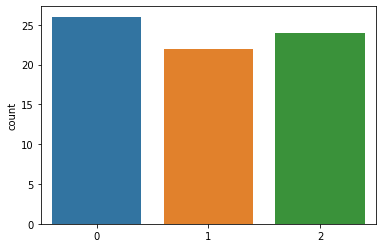

In [46]:
sns.countplot(y_pred_rf)

## 26. วัดผลโมเดล Random Forest ด้วย confusion matrix 


In [47]:
metrics.confusion_matrix(y_test, y_pred_rf)

array([[25,  0,  0],
       [ 1, 22,  1],
       [ 0,  0, 23]])

## 27. ประเมินผลโมเดล RF ด้วยคะแนน Accuracy, F1 score, Recall, Precision ทั้งแบบ Micro, Macro


In [48]:
df_eval = model_eval(y_test, y_pred_rf, 'RandomForest', df_eval)
df_eval

---Model Evaluation---
F1 score (micro) :  0.9722222222222222
F1 score (macro) :  0.971879100082833
Precision (micro) :  0.9722222222222222
Precision (macro) :  0.9732905982905984
Recall (micro) :  0.9722222222222222
Recall (macro) :  0.9722222222222222


,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
1,SVM+GridSearch,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
2,RandomForest,0.972222,0.972222,0.971879,0.972222,0.973291,0.972222,0.972222


## 28. ทำ Hyperparameter tuning ด้วย GridSearchCV กับ RF 


In [49]:
params = {'max_depth':[4,8,16,32,None], 
          'min_samples_leaf':[1,2,4,8,12,16,20], 
          'n_estimators' : [10,20,50,100,300]}
grid_rf = GridSearchCV(RandomForestClassifier(criterion='entropy', random_state=100,n_jobs=-1), params, verbose=2)
grid_rf.fit(X_train_sc, y_train)
print(grid_rf.best_params_)
# make prediction
y_pred_rf_grid = grid_rf.predict(X_test_sc)

Fitting 5 folds for each of 175 candidates, totalling 875 fits
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . max_depth=4, min_samples_leaf=1, n_estimators=10, total=   1.2s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] . max_depth=4, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV] .

[CV] . max_depth=4, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=100 ...............
[CV]  max_depth=4, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=100 ...............
[CV]  max_depth=4, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=100 ...............
[CV]  max_depth=4, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=100 ...............
[CV]  

[CV]  max_depth=4, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=4, min_samples_leaf=16, n_estimators=10 ...............
[CV]  max_depth=4, min_samples_leaf=16, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=16, n_estimators=10 ...............


[CV] . max_depth=8, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=50 ................
[CV] .

[CV] . max_depth=8, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=8, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=8, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=8, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=100 ...............
[CV]  max_depth=8, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=100 ...............
[CV]  max_depth=8, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=100 ...............
[CV]  max_depth=8, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=100 ...............
[CV]  

[CV]  max_depth=8, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=8, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=8, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=8, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=8, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=8, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=8, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=8, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=8, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=8, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=8, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=8, min_samples_leaf=16, n_estimators=10 ...............
[CV]  max_depth=8, min_samples_leaf=16, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=16, n_estimators=10 ...............


[CV]  max_depth=16, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=10 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=50 ...............
[CV]  

[CV]  max_depth=16, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=100 ..............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=100 ..............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=100 ..............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=100 ..............
[CV

[CV]  max_depth=16, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=16, min_samples_leaf=16, n_estimators=10 ..............
[CV]  max_depth=16, min_samples_leaf=16, n_estimators=10, total=   0.1s
[CV] max_depth=16, min_samples_leaf=16, n_estimators=10 ........

[CV]  max_depth=32, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=10 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=20, total=   0.2s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=50 ...............
[CV]  

[CV]  max_depth=32, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=32, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=32, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=32, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=32, min_samples_leaf=4, n_estimators=100 ..............
[CV]  max_depth=32, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=32, min_samples_leaf=4, n_estimators=100 ..............
[CV]  max_depth=32, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=32, min_samples_leaf=4, n_estimators=100 ..............
[CV]  max_depth=32, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=32, min_samples_leaf=4, n_estimators=100 ..............
[CV

[CV]  max_depth=32, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=32, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=32, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=32, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=32, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=32, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=32, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=32, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=32, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=32, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=32, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=32, min_samples_leaf=16, n_estimators=10 ..............
[CV]  max_depth=32, min_samples_leaf=16, n_estimators=10, total=   0.1s
[CV] max_depth=32, min_samples_leaf=16, n_estimators=10 ........

[CV]  max_depth=None, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=10 .............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=20 .............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=20 .............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=20 .............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=20 .............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=20 .............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=50 ......

[CV]  max_depth=None, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=None, min_samples_leaf=4, n_estimators=50 .............
[CV]  max_depth=None, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=None, min_samples_leaf=4, n_estimators=50 .............
[CV]  max_depth=None, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=None, min_samples_leaf=4, n_estimators=50 .............
[CV]  max_depth=None, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=None, min_samples_leaf=4, n_estimators=100 ............
[CV]  max_depth=None, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=None, min_samples_leaf=4, n_estimators=100 ............
[CV]  max_depth=None, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=None, min_samples_leaf=4, n_estimators=100 ............
[CV]  max_depth=None, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=None, min_samples_leaf=4, n_estimators=100 ..

[CV]  max_depth=None, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=None, min_samples_leaf=12, n_estimators=100 ...........
[CV]  max_depth=None, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=None, min_samples_leaf=12, n_estimators=300 ...........
[CV]  max_depth=None, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=None, min_samples_leaf=12, n_estimators=300 ...........
[CV]  max_depth=None, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=None, min_samples_leaf=12, n_estimators=300 ...........
[CV]  max_depth=None, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=None, min_samples_leaf=12, n_estimators=300 ...........
[CV]  max_depth=None, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=None, min_samples_leaf=12, n_estimators=300 ...........
[CV]  max_depth=None, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=None, min_samples_leaf=16, n_estim

[Parallel(n_jobs=1)]: Done 875 out of 875 | elapsed:  3.5min finished


{'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 100}


## 29. วัดผลโมเดล Random Forest หลัง Hyperparameter tuning ด้วย confusion matrix 


In [50]:
metrics.confusion_matrix(y_test, y_pred_rf_grid)

array([[25,  0,  0],
       [ 1, 22,  1],
       [ 0,  0, 23]])

## 30. ประเมินผลโมเดล RF หลัง Hyperparameter tuning ด้วยคะแนน Accuracy, F1 score, Recall, Precision ทั้งแบบ Micro, Macro


In [51]:
df_eval = model_eval(y_test, y_pred_rf_grid, 'RandomForest+GridSearch', df_eval)

---Model Evaluation---
F1 score (micro) :  0.9722222222222222
F1 score (macro) :  0.971879100082833
Precision (micro) :  0.9722222222222222
Precision (macro) :  0.9732905982905984
Recall (micro) :  0.9722222222222222
Recall (macro) :  0.9722222222222222


## 31. ใช้ seaborn และ matplotlib สร้าง subplot 9 รูป (3x3) แต่ละรูปเป็น Distribution Plot ของ Feature 1 – Feature 9


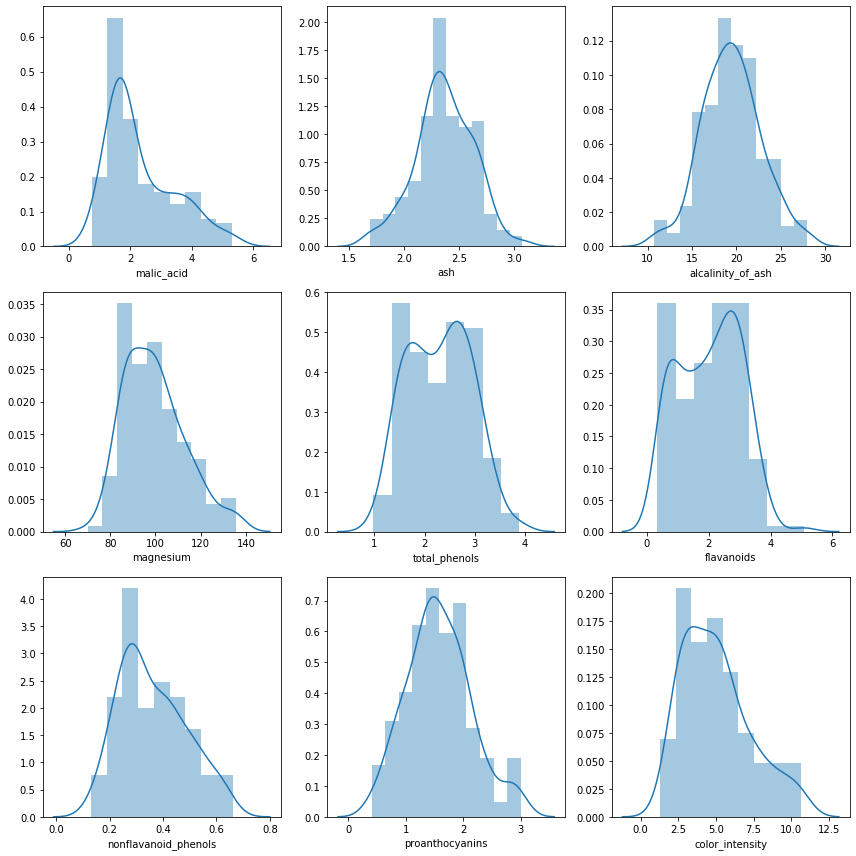

In [52]:
col = df.columns.values

fig = plt.figure(figsize=(12,12))
for i in range(1,10):
    plt.subplot(330+i)
    sns.distplot(df[col[i]])
fig.tight_layout()

## 32. ใช้ seaborn และ matplotlib สร้าง subplot 4 รูป (2x2) แต่ละรูปเป็น Distribution Plot ของ Feature 10 – Feature 13


<bound method Figure.tight_layout of <Figure size 576x576 with 4 Axes>>

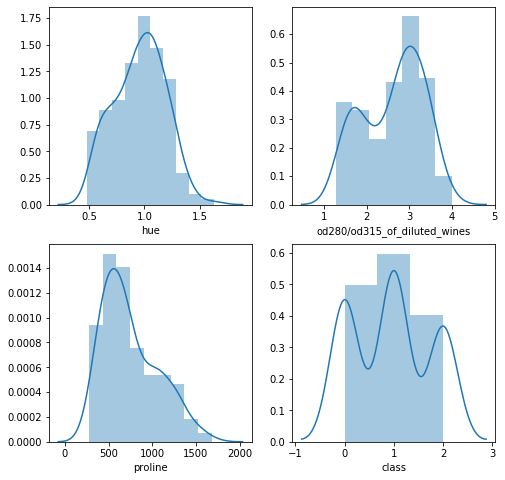

In [53]:
fig = plt.figure(figsize=(8,8))
for i in range(10,14):
    plt.subplot(220+i-9)
    sns.distplot(df[col[i]])
fig.tight_layout

## 33. จากข้อ 26-27 มีฟีเจอร์ใดบ้างที่เป็น Normal Distribution 


Note :  
มีเฉพาะ Proanthocyanins ที่มี distribution คล้าย normal distribution

## 34. สร้างตัวแปร Dimensionality Reduction แบบ LDA โดยกำหนด n_components = 2


In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [55]:
# define lda
lda = LDA(n_components=2)

## 35. ดำเนินการ LDA โดยใช้ X_train, y_train เป็นตัว fit และ X_test เป็น transform


In [56]:
# fit_transform X_train
X_train_lda = lda.fit_transform(X_train_sc, y_train)
# transform X_test
X_test_lda = lda.transform(X_test_sc)

In [57]:
print(X_train_lda.shape)
print(X_test_lda.shape)

(106, 2)
(72, 2)


## 36. สร้าง Visualization แบบ Clustering ด้วย LDA ทั้งสองแกน


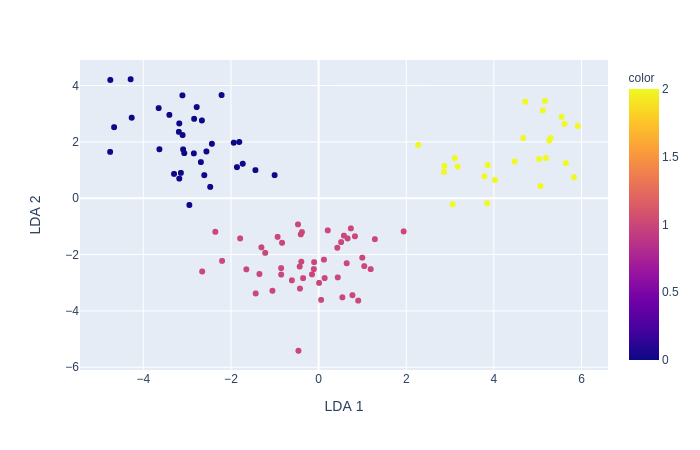

In [58]:
fig = px.scatter(x=X_train_lda[:,0], y=X_train_lda[:,1], color=y_train,
                labels={'x':'LDA 1', 'y':'LDA 2'})
fig.show()

## 37. สร้างโมเดลแบบ Support Vector Machine ด้วย Components จาก LDA (ข้อ 38-40 ใช้โมเดลจากข้อ 37)


In [59]:
# define model
clf = SVC()
# fit the model
clf.fit(X_train_lda, y_train)
# make prediction
y_pred_svm_lda = clf.predict(X_test_lda)

## 38. สร้าง countplot ของค่าที่ทำนายโดย Support Vector Machine


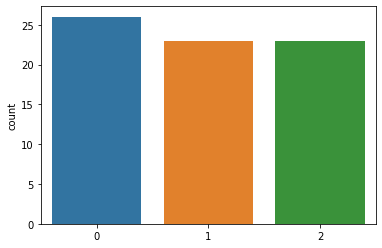

In [60]:
sns.countplot(y_pred_svm_lda)

## 39. วัดผลโมเดล SVM โดยใช้ confusion matrix


In [61]:
metrics.confusion_matrix(y_test, y_pred_svm_lda)

array([[25,  0,  0],
       [ 1, 22,  1],
       [ 0,  1, 22]])

## 40. ประเมินผลโมเดล SVM ด้วยคะแนน Accuracy, F1 score, Recall, Precision ทั้งแบบ Micro, Macro


In [62]:
df_eval = model_eval(y_test, y_pred_svm_lda, 'SVM+LDA', df_eval)
df_eval

---Model Evaluation---
F1 score (micro) :  0.9583333333333334
F1 score (macro) :  0.9576947029197124
Precision (micro) :  0.9583333333333334
Precision (macro) :  0.9581939799331103
Recall (micro) :  0.9583333333333334
Recall (macro) :  0.9577294685990339


,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
1,SVM+GridSearch,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
2,RandomForest,0.972222,0.972222,0.971879,0.972222,0.973291,0.972222,0.972222
3,RandomForest+GridSearch,0.972222,0.972222,0.971879,0.972222,0.973291,0.972222,0.972222
4,SVM+LDA,0.958333,0.958333,0.957695,0.958333,0.958194,0.958333,0.957729


## 41. ทำ Hyperparameter tuning ด้วย GridSearchCV กับ SVM ด้วย Components จาก LDA


In [63]:
params = {'C':[0.001,0.01, 0.1,1,10,100],
         'gamma':[0.001,0.01,0.1,1,10,30,100, 'scale']}
grid_svm = GridSearchCV(SVC(), params, verbose=2)
# fit the grid search
grid_svm.fit(X_train_lda, y_train)
print(grid_svm.best_params_)
# make prediction
y_pred_svm_lda_grid = grid_svm.predict(X_test_lda)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .............................. C=0.001, gamma=0.01, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=0.01, gamma=30, total=   0.0s
[CV] C=0.01, gamma=30 ................................................
[CV] ................................. C=0.01, gamma=30, total=   0.0s
[CV] C=0.01, gamma=100 ...............................................
[CV] ................................ C=0.01, gamma=100, total=   0.0s
[CV] C=0.01, gamma=100 ...............................................
[CV] ................................ C=0.01, gamma=100, total=   0.0s
[CV] C=0.01, gamma=100 ...............................................
[CV] ................................ C=0.01, gamma=100, total=   0.0s
[CV] C=0.01, gamma=100 ...............................................
[CV] ................................ C=0.01, gamma=100, total=   0.0s
[CV] C=0.01, gamma=100 ...............................................
[CV] ................................ C=0.01, gamma=100, total=   0.0s
[CV] C=0.01, gamma=scale .............................................
[CV] .

[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] .................................... C=1, gamma=10, total=   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] .

[CV] .................................. C=100, gamma=30, total=   0.0s
[CV] C=100, gamma=30 .................................................
[CV] .................................. C=100, gamma=30, total=   0.0s
[CV] C=100, gamma=30 .................................................
[CV] .................................. C=100, gamma=30, total=   0.0s
[CV] C=100, gamma=30 .................................................
[CV] .................................. C=100, gamma=30, total=   0.0s
[CV] C=100, gamma=30 .................................................
[CV] .................................. C=100, gamma=30, total=   0.0s
[CV] C=100, gamma=100 ................................................
[CV] ................................. C=100, gamma=100, total=   0.0s
[CV] C=100, gamma=100 ................................................
[CV] ................................. C=100, gamma=100, total=   0.0s
[CV] C=100, gamma=100 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.6s finished


## 42. วัดผลโมเดล SVM หลัง Hyperparameter tuning ด้วย confusion matrix


In [64]:
metrics.confusion_matrix(y_test, y_pred_svm_lda_grid)

array([[25,  0,  0],
       [ 1, 23,  0],
       [ 0,  1, 22]])

## 43. ประเมินผลโมเดล SVM หลัง Hyperparameter tuning ด้วยคะแนน Accuracy, F1 score, Recall, Precision ทั้งแบบ Micro, Macro


In [65]:
df_eval = model_eval(y_test, y_pred_svm_lda_grid, 'SVM+LDA+GridSearch', df_eval)

---Model Evaluation---
F1 score (micro) :  0.9722222222222222
F1 score (macro) :  0.9721677559912854
Precision (micro) :  0.9722222222222222
Precision (macro) :  0.9732905982905983
Recall (micro) :  0.9722222222222222
Recall (macro) :  0.9716183574879228


In [66]:
df_eval

,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
1,SVM+GridSearch,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
2,RandomForest,0.972222,0.972222,0.971879,0.972222,0.973291,0.972222,0.972222
3,RandomForest+GridSearch,0.972222,0.972222,0.971879,0.972222,0.973291,0.972222,0.972222
4,SVM+LDA,0.958333,0.958333,0.957695,0.958333,0.958194,0.958333,0.957729
5,SVM+LDA+GridSearch,0.972222,0.972222,0.972168,0.972222,0.973291,0.972222,0.971618


## 44. สร้างโมเดลแบบ Random Forest ด้วย Components จาก LDA (ข้อ 45-47 ใช้โมเดลจากข้อ 44)


In [67]:
# define model
clf = RandomForestClassifier(criterion='entropy', random_state=100)
# fit the model
clf.fit(X_train_lda, y_train)
# make prediction
y_pred_rf_lda = clf.predict(X_test_lda)

## 45. สร้าง countplot ของค่าที่ทำนายโดย RF


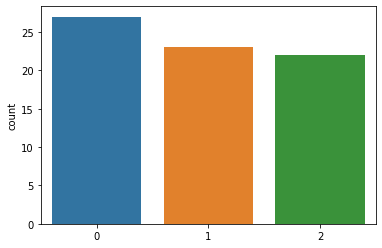

In [68]:
sns.countplot(y_pred_rf_lda)

## 46. วัดผลโมเดล RF โดยใช้ confusion matrix


In [69]:
metrics.confusion_matrix(y_test, y_pred_rf_lda)

array([[25,  0,  0],
       [ 2, 21,  1],
       [ 0,  2, 21]])

## 47. ประเมินผลโมเดล RF ด้วยคะแนน Accuracy, F1 score, Recall, Precision ทั้งแบบ Micro, Macro


In [70]:
df_eval = model_eval(y_test, y_pred_rf_lda, 'RandomForest+LDA', df_eval)

---Model Evaluation---
F1 score (micro) :  0.9305555555555556
F1 score (macro) :  0.9294962720494634
Precision (micro) :  0.9305555555555556
Precision (macro) :  0.9311716195774166
Recall (micro) :  0.9305555555555556
Recall (macro) :  0.9293478260869565


In [71]:
df_eval

,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
1,SVM+GridSearch,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
2,RandomForest,0.972222,0.972222,0.971879,0.972222,0.973291,0.972222,0.972222
3,RandomForest+GridSearch,0.972222,0.972222,0.971879,0.972222,0.973291,0.972222,0.972222
4,SVM+LDA,0.958333,0.958333,0.957695,0.958333,0.958194,0.958333,0.957729
5,SVM+LDA+GridSearch,0.972222,0.972222,0.972168,0.972222,0.973291,0.972222,0.971618
6,RandomForest+LDA,0.930556,0.930556,0.929496,0.930556,0.931172,0.930556,0.929348


## 48. Hyperparameter tuning ด้วย GridSearchCV กับ RF ด้วย Components จาก LDA


In [72]:
params = {'max_depth':[4,8,16,32,None], 
          'min_samples_leaf':[1,2,4,8,12,16,20], 
          'n_estimators' : [10,20,50,100,300]}
grid_rf = GridSearchCV(RandomForestClassifier(criterion='entropy', random_state=100,n_jobs=-1), params, verbose=2)
grid_rf.fit(X_train_lda, y_train)
print(grid_rf.best_params_)
# make prediction
y_pred_rf_lda_grid = grid_rf.predict(X_test_lda)

Fitting 5 folds for each of 175 candidates, totalling 875 fits
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] . max_depth=4, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV] .

[CV] . max_depth=4, min_samples_leaf=4, n_estimators=20, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=100 ...............
[CV]  max_depth=4, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=100 ...............
[CV]  

[CV]  max_depth=4, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=100 ..............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=100 ..............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=300 ..............

[CV] . max_depth=8, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=20 ................
[CV] .

[CV] . max_depth=8, min_samples_leaf=4, n_estimators=20, total=   0.1s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=8, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=8, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=8, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=8, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=8, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=100 ...............
[CV]  max_depth=8, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=100 ...............
[CV]  

[CV]  max_depth=8, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=8, min_samples_leaf=12, n_estimators=100 ..............
[CV]  max_depth=8, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=8, min_samples_leaf=12, n_estimators=100 ..............
[CV]  max_depth=8, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=8, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=8, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=8, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=8, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=8, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=8, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=8, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=8, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=8, min_samples_leaf=12, n_estimators=300 ..............

[CV]  max_depth=16, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=10 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=10 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=10 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=20 ...............
[CV]  

[CV]  max_depth=16, min_samples_leaf=4, n_estimators=20, total=   0.1s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=100 ..............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=100 ..............
[CV] 

[CV]  max_depth=16, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=100 .............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=100 .............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=300 ......

[CV]  max_depth=32, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=10 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=10 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=10 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=20 ...............
[CV]  

[CV]  max_depth=32, min_samples_leaf=4, n_estimators=20, total=   0.1s
[CV] max_depth=32, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=32, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=32, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=32, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=32, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=32, min_samples_leaf=4, n_estimators=100 ..............
[CV]  max_depth=32, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=32, min_samples_leaf=4, n_estimators=100 ..............
[CV] 

[CV]  max_depth=32, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=32, min_samples_leaf=12, n_estimators=100 .............
[CV]  max_depth=32, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=32, min_samples_leaf=12, n_estimators=100 .............
[CV]  max_depth=32, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=32, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=32, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=32, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=32, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=32, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=32, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=32, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=32, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=32, min_samples_leaf=12, n_estimators=300 ......

[CV]  max_depth=None, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=10 .............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=10 .............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=10 .............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=20 .............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=20 .............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=20 .............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=20 ......

[CV]  max_depth=None, min_samples_leaf=4, n_estimators=20, total=   0.1s
[CV] max_depth=None, min_samples_leaf=4, n_estimators=50 .............
[CV]  max_depth=None, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=None, min_samples_leaf=4, n_estimators=50 .............
[CV]  max_depth=None, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=None, min_samples_leaf=4, n_estimators=50 .............
[CV]  max_depth=None, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=None, min_samples_leaf=4, n_estimators=50 .............
[CV]  max_depth=None, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=None, min_samples_leaf=4, n_estimators=50 .............
[CV]  max_depth=None, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=None, min_samples_leaf=4, n_estimators=100 ............
[CV]  max_depth=None, min_samples_leaf=4, n_estimators=100, total=   0.3s
[CV] max_depth=None, min_samples_leaf=4, n_estimators=100 ....

[CV]  max_depth=None, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=None, min_samples_leaf=12, n_estimators=100 ...........
[CV]  max_depth=None, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=None, min_samples_leaf=12, n_estimators=100 ...........
[CV]  max_depth=None, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=None, min_samples_leaf=12, n_estimators=100 ...........
[CV]  max_depth=None, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=None, min_samples_leaf=12, n_estimators=300 ...........
[CV]  max_depth=None, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=None, min_samples_leaf=12, n_estimators=300 ...........
[CV]  max_depth=None, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=None, min_samples_leaf=12, n_estimators=300 ...........
[CV]  max_depth=None, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=None, min_samples_leaf=12, n_estim

[CV]  max_depth=None, min_samples_leaf=20, n_estimators=300, total=   0.5s
[CV] max_depth=None, min_samples_leaf=20, n_estimators=300 ...........
[CV]  max_depth=None, min_samples_leaf=20, n_estimators=300, total=   0.5s
{'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 20}


[Parallel(n_jobs=1)]: Done 875 out of 875 | elapsed:  3.5min finished


## 49. วัดผลโมเดล Random Forest หลัง Hyperparameter tuning ด้วย confusion matrix 


In [73]:
metrics.confusion_matrix(y_test, y_pred_rf_lda_grid)

array([[25,  0,  0],
       [ 2, 22,  0],
       [ 0,  2, 21]])

## 50. ประเมินผลโมเดล RF หลัง Hyperparameter tuning ด้วยคะแนน Accuracy, F1 score, Recall, Precision ทั้งแบบ Micro, Macro


In [74]:
df_eval = model_eval(y_test, y_pred_rf_lda_grid, 'RandomForest+LDA+GridSearch', df_eval)

---Model Evaluation---
F1 score (micro) :  0.9444444444444444
F1 score (macro) :  0.9442501942501943
Precision (micro) :  0.9444444444444444
Precision (macro) :  0.9475308641975309
Recall (micro) :  0.9444444444444444
Recall (macro) :  0.9432367149758454


In [75]:
df_eval

,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
1,SVM+GridSearch,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
2,RandomForest,0.972222,0.972222,0.971879,0.972222,0.973291,0.972222,0.972222
3,RandomForest+GridSearch,0.972222,0.972222,0.971879,0.972222,0.973291,0.972222,0.972222
4,SVM+LDA,0.958333,0.958333,0.957695,0.958333,0.958194,0.958333,0.957729
5,SVM+LDA+GridSearch,0.972222,0.972222,0.972168,0.972222,0.973291,0.972222,0.971618
6,RandomForest+LDA,0.930556,0.930556,0.929496,0.930556,0.931172,0.930556,0.929348
7,RandomForest+LDA+GridSearch,0.944444,0.944444,0.944250,0.944444,0.947531,0.944444,0.943237


## 51. สร้างตัวแปร Dimensionality Reduction แบบ PCA โดยกำหนด n_components = 2


In [76]:
from sklearn.decomposition import PCA

In [77]:
# define pca
pca = PCA(n_components=2)

## 52. ดำเนินการ PCA โดยใช้ X_train เป็นตัว fit และ X_test เป็น transform

In [78]:
# fit_transform X_train
X_train_pca = pca.fit_transform(X_train_sc)
# transform X_test
X_test_pca = pca.transform(X_test_sc)

In [79]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(106, 2)
(72, 2)


## 52.1 ทำ DataFrame วัดอิทธิพลของฟีเจอร์เก่าต่อ Components ใหม่ที่ PCA สร้างขึ้น

In [80]:
pca.components_

array([[ 0.17995162, -0.2400332 ,  0.01456088, -0.24635478,  0.13136457,
         0.40344865,  0.42508852, -0.28470224,  0.3417801 , -0.03333877,
         0.28169169,  0.35198003,  0.29351396],
       [-0.420217  , -0.28035228, -0.29398561, -0.01695669, -0.38541806,
        -0.03665621,  0.02570733,  0.008671  , -0.0365776 , -0.51779823,
         0.29938338,  0.20474837, -0.32630225]])

In [81]:
df_comp = pd.DataFrame(pca.components_, columns=X_train.columns)
df_comp

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.179952,-0.240033,0.014561,-0.246355,0.131365,0.403449,0.425089,-0.284702,0.341780,-0.033339,0.281692,0.351980,0.293514
1,-0.420217,-0.280352,-0.293986,-0.016957,-0.385418,-0.036656,0.025707,0.008671,-0.036578,-0.517798,0.299383,0.204748,-0.326302


## 52.2 ทำ Heatmap ของข้อ 52.1


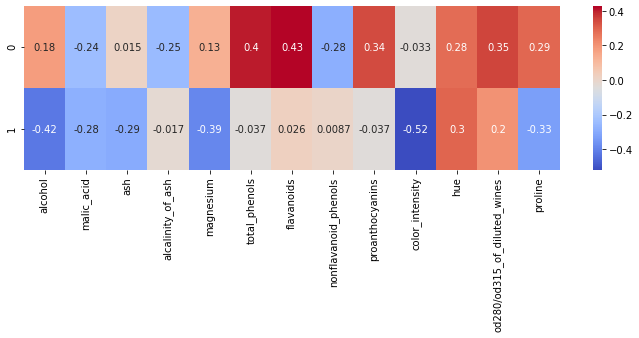

In [82]:
fig = plt.figure(figsize=(12,3))
sns.heatmap(df_comp, annot=True, cmap='coolwarm')

## 53. ทำ Clustering Visualization ของ 2 Components จาก PCA ต่อผลลัพธ์ทั้ง 3 Classes


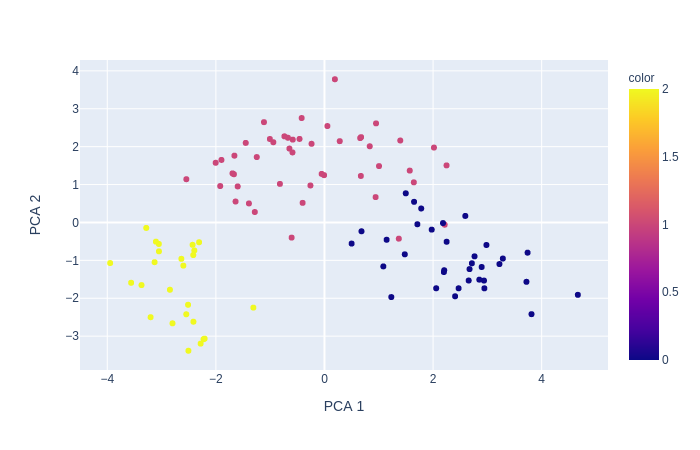

In [83]:
fig = px.scatter(x=X_train_pca[:,0], y=X_train_pca[:,1], color=y_train,
                labels={'x':'PCA 1', 'y':'PCA 2'})
fig.show()

## 54. สร้างโมเดลแบบ Support Vector Machine ด้วย Components จาก PCA (ข้อ 55-57 ใช้โมเดลจากข้อ 54)


In [84]:
# define a model
clf = SVC()
# fit the model
clf.fit(X_train_pca, y_train)
# make prediction
y_pred_svm_pca = clf.predict(X_test_pca)

## 55. สร้าง countplot ของค่าที่ทำนายโดย Support Vector Machine


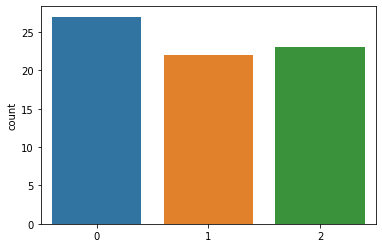

In [85]:
sns.countplot(y_pred_svm_pca)

## 56. วัดผลโมเดล SVM โดยใช้ confusion matrix


In [86]:
metrics.confusion_matrix(y_test, y_pred_svm_pca)

array([[25,  0,  0],
       [ 2, 21,  1],
       [ 0,  1, 22]])

## 57. ประเมินผลโมเดล SVM ด้วยคะแนน Accuracy, F1 score, Recall, Precision ทั้งแบบ Micro, Macro


In [87]:
df_eval = model_eval(y_test, y_pred_svm_pca, 'SVM+PCA', df_eval)

---Model Evaluation---
F1 score (micro) :  0.9444444444444444
F1 score (macro) :  0.9437012263099218
Precision (micro) :  0.9444444444444444
Precision (macro) :  0.945664373200605
Recall (micro) :  0.9444444444444444
Recall (macro) :  0.9438405797101449


In [88]:
df_eval

,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
1,SVM+GridSearch,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
2,RandomForest,0.972222,0.972222,0.971879,0.972222,0.973291,0.972222,0.972222
3,RandomForest+GridSearch,0.972222,0.972222,0.971879,0.972222,0.973291,0.972222,0.972222
4,SVM+LDA,0.958333,0.958333,0.957695,0.958333,0.958194,0.958333,0.957729
5,SVM+LDA+GridSearch,0.972222,0.972222,0.972168,0.972222,0.973291,0.972222,0.971618
6,RandomForest+LDA,0.930556,0.930556,0.929496,0.930556,0.931172,0.930556,0.929348
7,RandomForest+LDA+GridSearch,0.944444,0.944444,0.944250,0.944444,0.947531,0.944444,0.943237
8,SVM+PCA,0.944444,0.944444,0.943701,0.944444,0.945664,0.944444,0.943841


## 58. ทำ Hyperparameter tuning ด้วย GridSearchCV กับ SVM ด้วย Components จาก PCA


In [89]:
params = {'C':[0.001,0.01, 0.1,1,10,100],
         'gamma':[0.001,0.01,0.1,1,10,30,100, 'scale']}
grid_svm_pca = GridSearchCV(SVC(), params, verbose=2)
# fit the grid search
grid_svm_pca.fit(X_train_pca, y_train)
print(grid_svm_pca.best_params_)
# make prediction
y_pred_svm_pca_grid = grid_svm_pca.predict(X_test_pca)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .............................. C=0.001, gamma=0.01, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=0.01, gamma=30, total=   0.0s
[CV] C=0.01, gamma=100 ...............................................
[CV] ................................ C=0.01, gamma=100, total=   0.0s
[CV] C=0.01, gamma=100 ...............................................
[CV] ................................ C=0.01, gamma=100, total=   0.0s
[CV] C=0.01, gamma=100 ...............................................
[CV] ................................ C=0.01, gamma=100, total=   0.0s
[CV] C=0.01, gamma=100 ...............................................
[CV] ................................ C=0.01, gamma=100, total=   0.0s
[CV] C=0.01, gamma=100 ...............................................
[CV] ................................ C=0.01, gamma=100, total=   0.0s
[CV] C=0.01, gamma=scale .............................................
[CV] .............................. C=0.01, gamma=scale, total=   0.0s
[CV] C=0.01, gamma=scale .............................................
[CV] .

[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] .................................... C=1, gamma=10, total=   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] .

[CV] .................................. C=100, gamma=10, total=   0.0s
[CV] C=100, gamma=10 .................................................
[CV] .................................. C=100, gamma=10, total=   0.0s
[CV] C=100, gamma=10 .................................................
[CV] .................................. C=100, gamma=10, total=   0.0s
[CV] C=100, gamma=10 .................................................
[CV] .................................. C=100, gamma=10, total=   0.0s
[CV] C=100, gamma=30 .................................................
[CV] .................................. C=100, gamma=30, total=   0.0s
[CV] C=100, gamma=30 .................................................
[CV] .................................. C=100, gamma=30, total=   0.0s
[CV] C=100, gamma=30 .................................................
[CV] .................................. C=100, gamma=30, total=   0.0s
[CV] C=100, gamma=30 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.6s finished


## 59. วัดผลโมเดล SVM หลัง Hyperparameter tuning ด้วย confusion matrix


In [90]:
metrics.confusion_matrix(y_test, y_pred_svm_pca_grid)

array([[25,  0,  0],
       [ 1, 22,  1],
       [ 0,  2, 21]])

## 60. ประเมินผลโมเดล SVM หลัง Hyperparameter tuning ด้วยคะแนน Accuracy, F1 score, Recall, Precision ทั้งแบบ Micro, Macro


In [91]:
df_eval = model_eval(y_test, y_pred_svm_pca_grid, 'SVM+PCA+GridSearch', df_eval)

---Model Evaluation---
F1 score (micro) :  0.9444444444444444
F1 score (macro) :  0.9434640522875816
Precision (micro) :  0.9444444444444444
Precision (macro) :  0.9442501942501943
Recall (micro) :  0.9444444444444444
Recall (macro) :  0.9432367149758454


In [92]:
df_eval

,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
1,SVM+GridSearch,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
2,RandomForest,0.972222,0.972222,0.971879,0.972222,0.973291,0.972222,0.972222
3,RandomForest+GridSearch,0.972222,0.972222,0.971879,0.972222,0.973291,0.972222,0.972222
4,SVM+LDA,0.958333,0.958333,0.957695,0.958333,0.958194,0.958333,0.957729
5,SVM+LDA+GridSearch,0.972222,0.972222,0.972168,0.972222,0.973291,0.972222,0.971618
6,RandomForest+LDA,0.930556,0.930556,0.929496,0.930556,0.931172,0.930556,0.929348
7,RandomForest+LDA+GridSearch,0.944444,0.944444,0.944250,0.944444,0.947531,0.944444,0.943237
8,SVM+PCA,0.944444,0.944444,0.943701,0.944444,0.945664,0.944444,0.943841
9,SVM+PCA+GridSearch,0.944444,0.944444,0.943464,0.944444,0.944250,0.944444,0.943237


Note :  
ประสิทธิภาพของโมเดลหลังทำ Grid Search มีประสิทธิภาพลดลงเล็กน้อยจาก default SVM

## 61. สร้างโมเดลแบบ Random Forest ด้วย Components จาก PCA (ข้อ 62-64 ใช้โมเดลจากข้อ 61)


In [93]:
# define model
clf = RandomForestClassifier(criterion='entropy', random_state=100)
# fit the model
clf.fit(X_train_pca, y_train)
# make prediction
y_pred_rf_pca = clf.predict(X_test_pca)

## 62. สร้าง countplot ของค่าที่ทำนายโดย RF


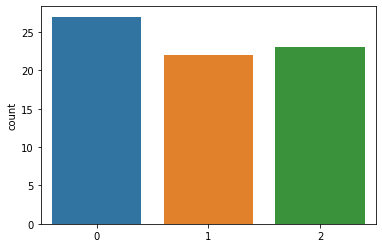

In [94]:
sns.countplot(y_pred_rf_pca)

## 63. วัดผลโมเดล RF โดยใช้ confusion matrix


In [95]:
metrics.confusion_matrix(y_test, y_pred_rf_pca)

array([[25,  0,  0],
       [ 2, 21,  1],
       [ 0,  1, 22]])

## 64. ประเมินผลโมเดล RF ด้วยคะแนน Accuracy, F1 score, Recall, Precision ทั้งแบบ Micro, Macro


In [96]:
df_eval = model_eval(y_test, y_pred_rf_pca, 'RandomForest+PCA', df_eval)

---Model Evaluation---
F1 score (micro) :  0.9444444444444444
F1 score (macro) :  0.9437012263099218
Precision (micro) :  0.9444444444444444
Precision (macro) :  0.945664373200605
Recall (micro) :  0.9444444444444444
Recall (macro) :  0.9438405797101449


In [97]:
df_eval

,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
1,SVM+GridSearch,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
2,RandomForest,0.972222,0.972222,0.971879,0.972222,0.973291,0.972222,0.972222
3,RandomForest+GridSearch,0.972222,0.972222,0.971879,0.972222,0.973291,0.972222,0.972222
4,SVM+LDA,0.958333,0.958333,0.957695,0.958333,0.958194,0.958333,0.957729
5,SVM+LDA+GridSearch,0.972222,0.972222,0.972168,0.972222,0.973291,0.972222,0.971618
6,RandomForest+LDA,0.930556,0.930556,0.929496,0.930556,0.931172,0.930556,0.929348
7,RandomForest+LDA+GridSearch,0.944444,0.944444,0.944250,0.944444,0.947531,0.944444,0.943237
8,SVM+PCA,0.944444,0.944444,0.943701,0.944444,0.945664,0.944444,0.943841
9,SVM+PCA+GridSearch,0.944444,0.944444,0.943464,0.944444,0.944250,0.944444,0.943237


Note :  
ประสิทธิภาพโมเดลเหมือนกับ SVM+PCA

## 65. ทำ Hyperparameter tuning ด้วย GridSearchCV กับ RF ด้วย Components จาก PCA


In [98]:
params = {'max_depth':[4,8,16,32,None], 
          'min_samples_leaf':[1,2,4,8,12,16,20], 
          'n_estimators' : [10,20,50,100,300]}
grid_rf_pca = GridSearchCV(RandomForestClassifier(criterion='entropy', random_state=100,n_jobs=-1), params, verbose=2)
grid_rf_pca.fit(X_train_pca, y_train)
print(grid_rf_pca.best_params_)
# make prediction
y_pred_rf_pca_grid = grid_rf_pca.predict(X_test_pca)

Fitting 5 folds for each of 175 candidates, totalling 875 fits
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] . max_depth=4, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=4, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV] .

[CV] . max_depth=4, min_samples_leaf=4, n_estimators=20, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=4, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=100 ...............
[CV]  max_depth=4, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=100 ...............
[CV]  

[CV]  max_depth=4, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=100 ..............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=100 ..............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=300 ..............

[CV] . max_depth=8, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=10 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=20 ................
[CV] . max_depth=8, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=8, min_samples_leaf=1, n_estimators=20 ................
[CV] .

[CV] . max_depth=8, min_samples_leaf=4, n_estimators=20, total=   0.1s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=8, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=8, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=8, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=8, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=50 ................
[CV] . max_depth=8, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=100 ...............
[CV]  max_depth=8, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=8, min_samples_leaf=4, n_estimators=100 ...............
[CV]  

[CV]  max_depth=8, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=8, min_samples_leaf=12, n_estimators=100 ..............
[CV]  max_depth=8, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=8, min_samples_leaf=12, n_estimators=100 ..............
[CV]  max_depth=8, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=8, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=8, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=8, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=8, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=8, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=8, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=8, min_samples_leaf=12, n_estimators=300 ..............
[CV]  max_depth=8, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=8, min_samples_leaf=12, n_estimators=300 ..............

[CV]  max_depth=16, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=10 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=10 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=10 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=20 ...............
[CV]  

[CV]  max_depth=16, min_samples_leaf=4, n_estimators=20, total=   0.1s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=100 ..............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=100 ..............
[CV] 

[CV]  max_depth=16, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=100 .............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=100 .............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=300, total=   0.7s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=300 ......

[CV]  max_depth=32, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=10 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=10 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=10 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=20 ...............
[CV]  

[CV]  max_depth=32, min_samples_leaf=4, n_estimators=20, total=   0.1s
[CV] max_depth=32, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=32, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=32, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=32, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=32, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=32, min_samples_leaf=4, n_estimators=100 ..............
[CV]  max_depth=32, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=32, min_samples_leaf=4, n_estimators=100 ..............
[CV] 

[CV]  max_depth=32, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=32, min_samples_leaf=12, n_estimators=100 .............
[CV]  max_depth=32, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=32, min_samples_leaf=12, n_estimators=100 .............
[CV]  max_depth=32, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=32, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=32, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=32, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=32, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=32, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=32, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=32, min_samples_leaf=12, n_estimators=300 .............
[CV]  max_depth=32, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=32, min_samples_leaf=12, n_estimators=300 ......

[CV]  max_depth=None, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=10 .............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=10 .............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=10 .............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=10, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=20 .............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=20 .............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=20 .............
[CV]  max_depth=None, min_samples_leaf=1, n_estimators=20, total=   0.1s
[CV] max_depth=None, min_samples_leaf=1, n_estimators=20 ......

[CV]  max_depth=None, min_samples_leaf=4, n_estimators=20, total=   0.1s
[CV] max_depth=None, min_samples_leaf=4, n_estimators=50 .............
[CV]  max_depth=None, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=None, min_samples_leaf=4, n_estimators=50 .............
[CV]  max_depth=None, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=None, min_samples_leaf=4, n_estimators=50 .............
[CV]  max_depth=None, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=None, min_samples_leaf=4, n_estimators=50 .............
[CV]  max_depth=None, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=None, min_samples_leaf=4, n_estimators=50 .............
[CV]  max_depth=None, min_samples_leaf=4, n_estimators=50, total=   0.2s
[CV] max_depth=None, min_samples_leaf=4, n_estimators=100 ............
[CV]  max_depth=None, min_samples_leaf=4, n_estimators=100, total=   0.2s
[CV] max_depth=None, min_samples_leaf=4, n_estimators=100 ....

[CV]  max_depth=None, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=None, min_samples_leaf=12, n_estimators=100 ...........
[CV]  max_depth=None, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=None, min_samples_leaf=12, n_estimators=100 ...........
[CV]  max_depth=None, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=None, min_samples_leaf=12, n_estimators=100 ...........
[CV]  max_depth=None, min_samples_leaf=12, n_estimators=100, total=   0.2s
[CV] max_depth=None, min_samples_leaf=12, n_estimators=300 ...........
[CV]  max_depth=None, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=None, min_samples_leaf=12, n_estimators=300 ...........
[CV]  max_depth=None, min_samples_leaf=12, n_estimators=300, total=   0.5s
[CV] max_depth=None, min_samples_leaf=12, n_estimators=300 ...........
[CV]  max_depth=None, min_samples_leaf=12, n_estimators=300, total=   0.6s
[CV] max_depth=None, min_samples_leaf=12, n_estim

[CV]  max_depth=None, min_samples_leaf=20, n_estimators=300, total=   0.5s
[CV] max_depth=None, min_samples_leaf=20, n_estimators=300 ...........
[CV]  max_depth=None, min_samples_leaf=20, n_estimators=300, total=   0.5s


[Parallel(n_jobs=1)]: Done 875 out of 875 | elapsed:  3.6min finished


{'max_depth': 4, 'min_samples_leaf': 4, 'n_estimators': 100}


## 66. วัดผลโมเดล RF หลัง Hyperparameter tuning ด้วย confusion matrix


In [99]:
metrics.confusion_matrix(y_test, y_pred_rf_pca_grid)

array([[25,  0,  0],
       [ 2, 21,  1],
       [ 0,  0, 23]])

## 67. ประเมินผลโมเดล RF หลัง Hyperparameter tuning ด้วยคะแนน Accuracy, F1 score, Recall, Precision ทั้งแบบ Micro, Macro


In [100]:
df_eval = model_eval(y_test, y_pred_rf_pca_grid, 'RandomForest+PCA+GridSearch', df_eval)

---Model Evaluation---
F1 score (micro) :  0.9583333333333334
F1 score (macro) :  0.9578650663757046
Precision (micro) :  0.9583333333333334
Precision (macro) :  0.9614197530864198
Recall (micro) :  0.9583333333333334
Recall (macro) :  0.9583333333333334


In [101]:
df_eval

,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
1,SVM+GridSearch,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
2,RandomForest,0.972222,0.972222,0.971879,0.972222,0.973291,0.972222,0.972222
3,RandomForest+GridSearch,0.972222,0.972222,0.971879,0.972222,0.973291,0.972222,0.972222
4,SVM+LDA,0.958333,0.958333,0.957695,0.958333,0.958194,0.958333,0.957729
5,SVM+LDA+GridSearch,0.972222,0.972222,0.972168,0.972222,0.973291,0.972222,0.971618
6,RandomForest+LDA,0.930556,0.930556,0.929496,0.930556,0.931172,0.930556,0.929348
7,RandomForest+LDA+GridSearch,0.944444,0.944444,0.944250,0.944444,0.947531,0.944444,0.943237
8,SVM+PCA,0.944444,0.944444,0.943701,0.944444,0.945664,0.944444,0.943841
9,SVM+PCA+GridSearch,0.944444,0.944444,0.943464,0.944444,0.944250,0.944444,0.943237


Note :  
ทำได้ดีกว่าโมเดลอื่นๆที่ใช้ data แบบ pca

## 68. ทำ Data Visualization ของทุกโมเดล (ก่อน hyperparameter tuning) ที่ทำมา โดยใช้ Seaborn โดยให้แกน X เป็น ชื่อวิธีการ เช่น (RF + PCA) แกน Y เป็นคะแนน กำหนดให้ hue เป็น Acc, F1 Score, Precision, Recall (ใช้ Macro)


In [106]:
df_eval

,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
1,SVM+GridSearch,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
2,RandomForest,0.972222,0.972222,0.971879,0.972222,0.973291,0.972222,0.972222
3,RandomForest+GridSearch,0.972222,0.972222,0.971879,0.972222,0.973291,0.972222,0.972222
4,SVM+LDA,0.958333,0.958333,0.957695,0.958333,0.958194,0.958333,0.957729
5,SVM+LDA+GridSearch,0.972222,0.972222,0.972168,0.972222,0.973291,0.972222,0.971618
6,RandomForest+LDA,0.930556,0.930556,0.929496,0.930556,0.931172,0.930556,0.929348
7,RandomForest+LDA+GridSearch,0.944444,0.944444,0.944250,0.944444,0.947531,0.944444,0.943237
8,SVM+PCA,0.944444,0.944444,0.943701,0.944444,0.945664,0.944444,0.943841
9,SVM+PCA+GridSearch,0.944444,0.944444,0.943464,0.944444,0.944250,0.944444,0.943237


In [122]:
# แยกเป็น df ก่อน และ หลัง hyperparameter tuning
df_before_ht = df_eval[::2]
df_before_ht

,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
0,SVM,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
2,RandomForest,0.972222,0.972222,0.971879,0.972222,0.973291,0.972222,0.972222
4,SVM+LDA,0.958333,0.958333,0.957695,0.958333,0.958194,0.958333,0.957729
6,RandomForest+LDA,0.930556,0.930556,0.929496,0.930556,0.931172,0.930556,0.929348
8,SVM+PCA,0.944444,0.944444,0.943701,0.944444,0.945664,0.944444,0.943841
10,RandomForest+PCA,0.944444,0.944444,0.943701,0.944444,0.945664,0.944444,0.943841


In [123]:
df_after_ht = df_eval[1::2]
df_after_ht

,Model,Acc,F1_micro,F1_macro,Precision_micro,Precision_macro,Recall_micro,Recall_macro
1,SVM+GridSearch,0.958333,0.958333,0.958296,0.958333,0.958841,0.958333,0.958285
3,RandomForest+GridSearch,0.972222,0.972222,0.971879,0.972222,0.973291,0.972222,0.972222
5,SVM+LDA+GridSearch,0.972222,0.972222,0.972168,0.972222,0.973291,0.972222,0.971618
7,RandomForest+LDA+GridSearch,0.944444,0.944444,0.944250,0.944444,0.947531,0.944444,0.943237
9,SVM+PCA+GridSearch,0.944444,0.944444,0.943464,0.944444,0.944250,0.944444,0.943237
11,RandomForest+PCA+GridSearch,0.958333,0.958333,0.957865,0.958333,0.961420,0.958333,0.958333


In [124]:
# ทำ unpivot 
df_before_ht = df_before_ht.melt(id_vars=['Model'], var_name='score_type', value_name='score')
df_before_ht

,Model,score_type,score
0,SVM,Acc,0.958333
1,RandomForest,Acc,0.972222
2,SVM+LDA,Acc,0.958333
3,RandomForest+LDA,Acc,0.930556
4,SVM+PCA,Acc,0.944444
5,RandomForest+PCA,Acc,0.944444
6,SVM,F1_micro,0.958333
7,RandomForest,F1_micro,0.972222
8,SVM+LDA,F1_micro,0.958333
9,RandomForest+LDA,F1_micro,0.930556


In [125]:
df_after_ht = df_after_ht.melt(id_vars=['Model'], var_name='score_type', value_name='score')
df_after_ht

,Model,score_type,score
0,SVM+GridSearch,Acc,0.958333
1,RandomForest+GridSearch,Acc,0.972222
2,SVM+LDA+GridSearch,Acc,0.972222
3,RandomForest+LDA+GridSearch,Acc,0.944444
4,SVM+PCA+GridSearch,Acc,0.944444
5,RandomForest+PCA+GridSearch,Acc,0.958333
6,SVM+GridSearch,F1_micro,0.958333
7,RandomForest+GridSearch,F1_micro,0.972222
8,SVM+LDA+GridSearch,F1_micro,0.972222
9,RandomForest+LDA+GridSearch,F1_micro,0.944444


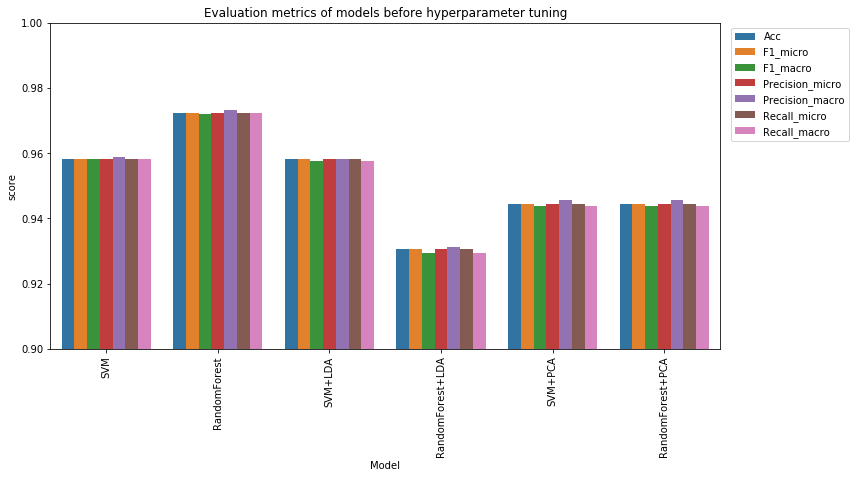

In [131]:
fig = plt.figure(figsize=(12,6))
sns.barplot(data=df_before_ht, x='Model', y='score', hue='score_type')
plt.xticks(rotation=90)
plt.ylim((0.9,1))
plt.legend(bbox_to_anchor=(1.2,1))
plt.title('Evaluation metrics of models before hyperparameter tuning')
plt.show()

Note :  
ก่อนการทำ Hyperparameter Tuning พบว่า Random Forest สามารถทำได้ดี แม้ไม่มี dimensionality reduction

## 69. ทำ Data Visualization ของทุกโมเดล (หลัง hyperparameter tuning) ที่ทำมา โดยใช้ Seaborn โดยให้แกน X เป็น ชื่อวิธีการ เช่น (RF + PCA) แกน Y เป็นคะแนน กำหนดให้ hue เป็น Acc, F1 Score, Precision, Recall (ใช้ Micro)


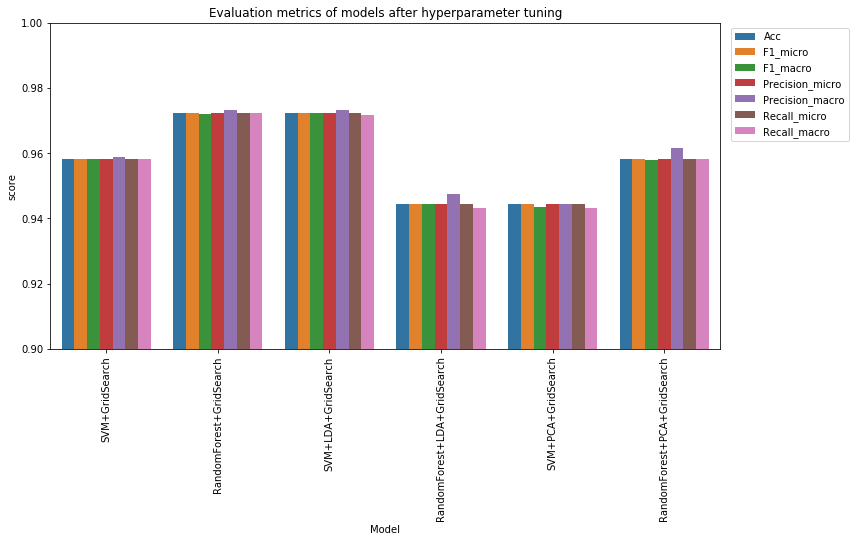

In [130]:
fig = plt.figure(figsize=(12,6))
sns.barplot(data=df_after_ht, x='Model', y='score', hue='score_type')
plt.xticks(rotation=90)
plt.ylim((0.9,1))
plt.legend(bbox_to_anchor=(1.2,1))
plt.title('Evaluation metrics of models after hyperparameter tuning')
plt.show()

Note :  
เมื่อทำ Hyperparameter tuning จะเห็นว่าโมเดล SVM + LDA มีประสิทธิภาพดีพอๆกับ Random forest

## 70. ทำ Data Visualization ของโมเดล SVM + LDA, SVM + PCA, RF + LDA และ RF + PCA โดยให้ชื่อโมเดลเป็นแกน X และ คะแนน Acc เป็นแกน Y โดยใช้ plotly 


In [146]:
df_pca_lda = df_eval[5::2][['Model','Acc']]
df_pca_lda

,Model,Acc
5,SVM+LDA+GridSearch,0.972222
7,RandomForest+LDA+GridSearch,0.944444
9,SVM+PCA+GridSearch,0.944444
11,RandomForest+PCA+GridSearch,0.958333


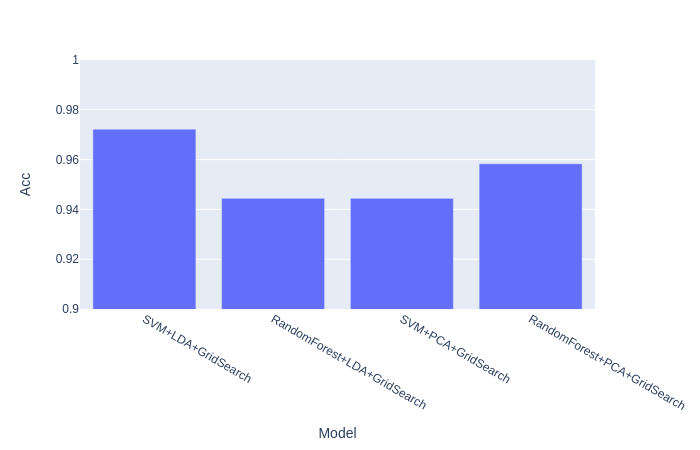

In [148]:
fig = px.bar(data_frame=df_pca_lda, x='Model', y='Acc', range_y=[0.9,1])
fig.show()

Note :  
สำหรับ การทำ dimensionality reduction บน dataset นี้ โมเดล SVM + LDA ให้ประสิทธิภาพดีที่สุด